In [212]:
## run notebooks
#%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Stitching_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%run "../Notebooks/Meshing_functions.ipynb"
%load_ext autoreload

----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
----------------------------------------
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
----------------------------------------
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
----------------------------------------
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# THE MODEL

## load solid file in extension 

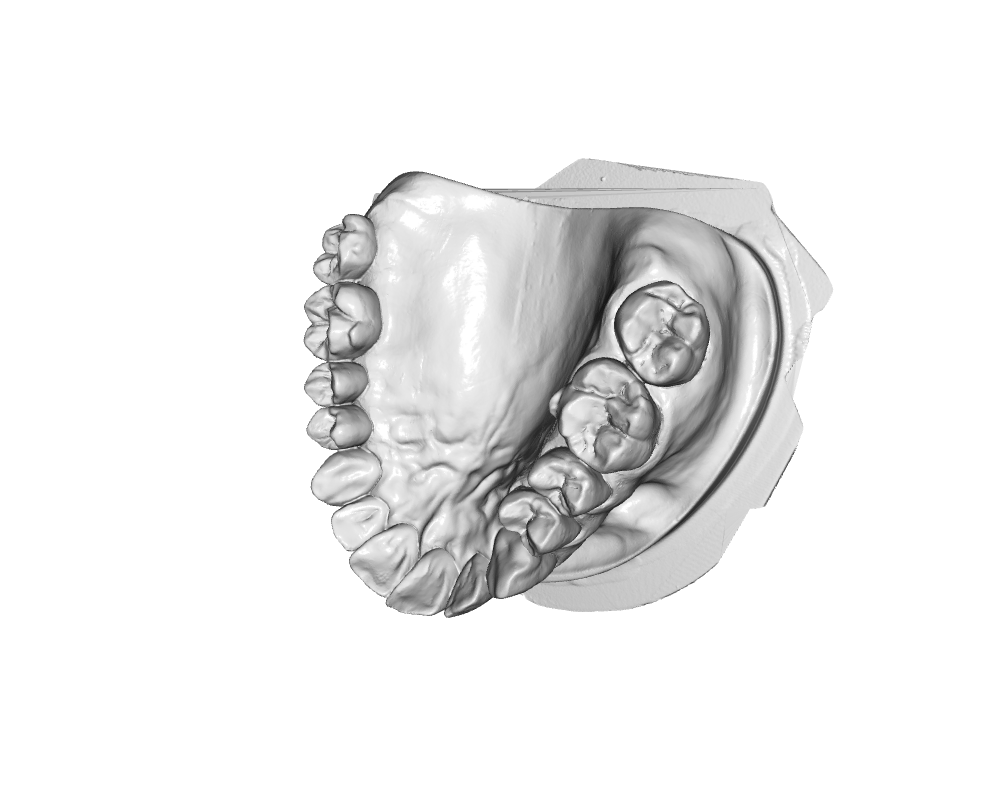

In [188]:
mesh = o3d.io.read_triangle_mesh("dental.stl")
mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([mesh],
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 600, height = 400) 

## convert it to point cloud

In [189]:
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.colors = mesh.vertex_colors
pcd.normals = mesh.vertex_normals

## visualize it 

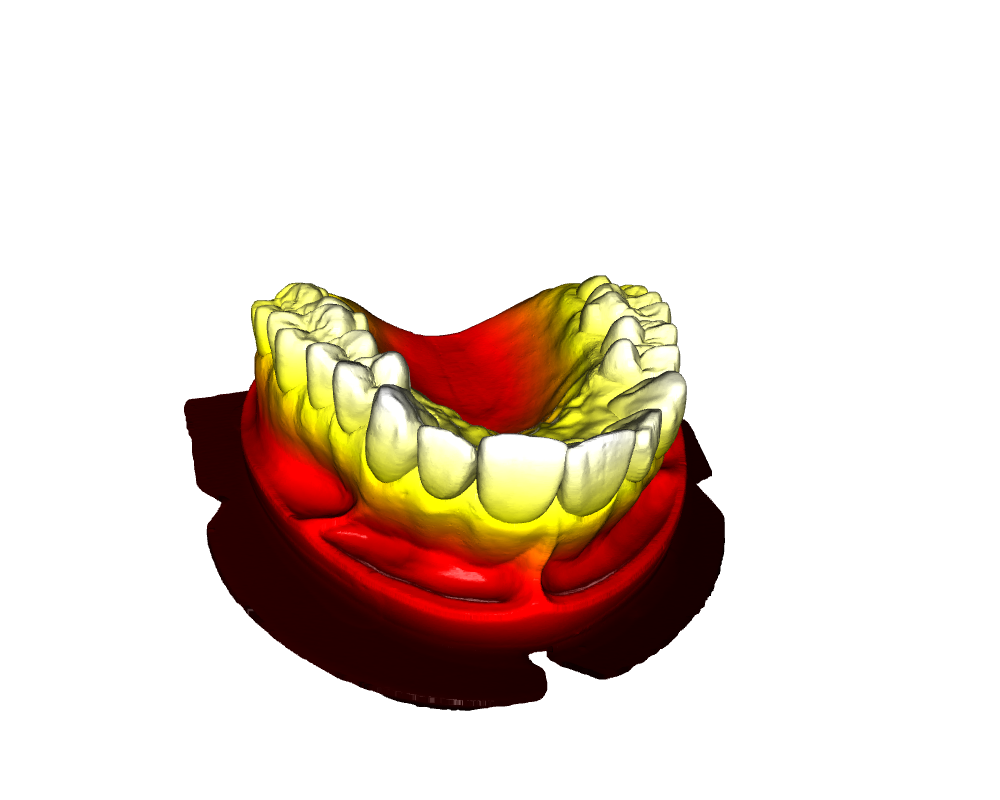

In [190]:
custom_draw_geometry(pcd,
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [38]:
pcd.points

std::vector<Eigen::Vector3d> with 3379896 elements.
Use numpy.asarray() to access data.

# OUR RESULTS

we can use either the mesh, which is elaborated, or the last pointcloud after cluster removal.

## mesh as input- load our own best point cloud-with meshing and so on
## TODO
retry with this one too!

PointCloud with 528615 points.


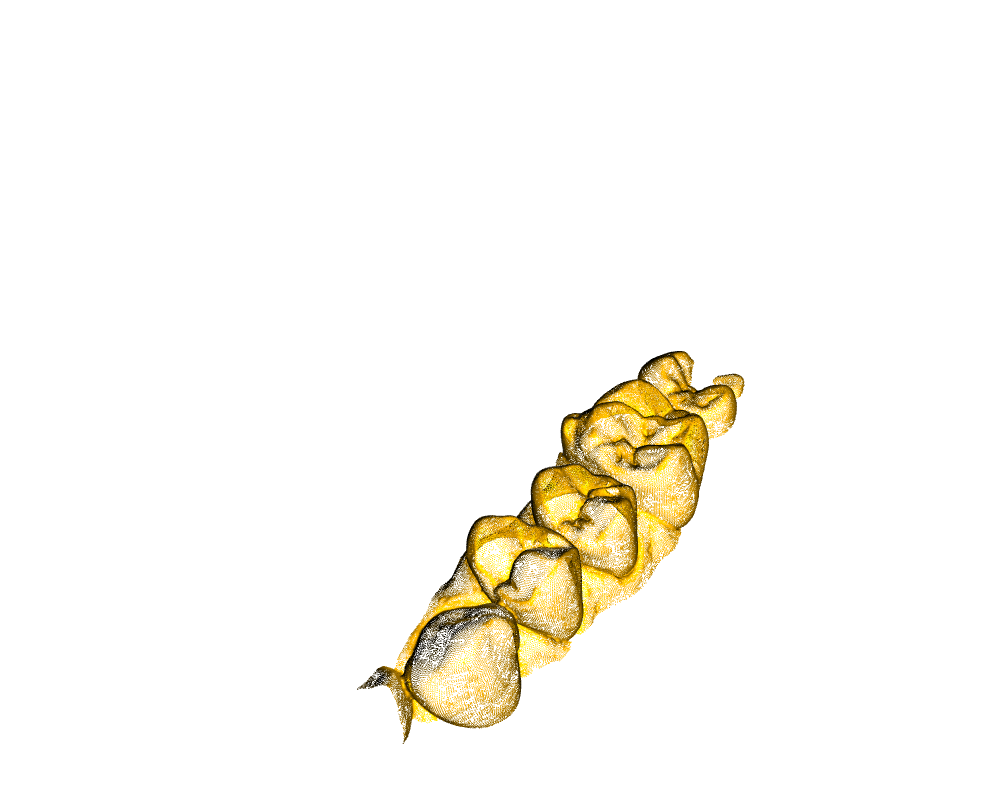

In [203]:
# LOAD MODEL CROPPED
last_model_cropped = o3d.io.read_point_cloud(
                                            last_file_containing("model_cropped", extension = '.ply')
                                            )
print (last_model_cropped)
custom_draw_geometry(last_model_cropped,
                     mytitle = "Model cropped",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

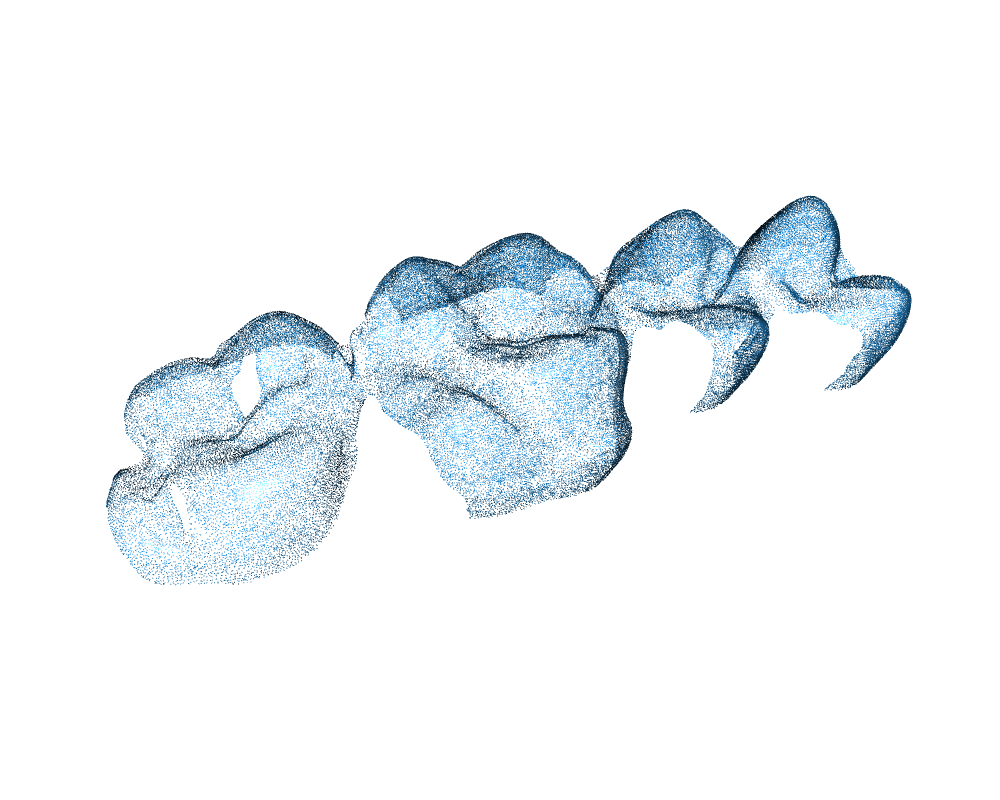

In [207]:
#load point cloud
## TODO load the clean one 
#st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
aftermesh_st_pcd= o3d.io.read_point_cloud("cropped_6.ply")
custom_draw_geometry(aftermesh_st_pcd,
                     mytitle = "Cropped_6",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [208]:
mesh_model_list_stitches = [last_model_cropped,aftermesh_st_pcd]
mesh_model_lables = ["mesh_model_pc","stitched_pc"]

In [220]:
transf,new_picked_id_source,new_picked_id_target,registration = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = mesh_model_list_stitches,
                                                                             labels_stitches = mesh_model_lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scale_factor = 1000,
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             #picked_id_source = list_picked_id_source[0],
                                                                             #picked_id_target = list_picked_id_target[0],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
51851
13438
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #48378 (-32., -18., 41.) to add in queue.
[Open3D INFO] Picked point #17680 (-29., -24., 40.) to add in queue.
[Open3D INFO] Picked point #32663 (-30., -30., 40.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #7840 (20., 1.9, 42.) to add in queue.
[Open3D INFO] Picked point #7880 (12., 3.5, 39.) to add in queue.
[Open3D INFO] Picked point #9393 (5.5, 8.1, 40.) to add in queue.

[48378, 17680, 32663]
RegistrationResult with fitness=1.581455e-03, inlier_rmse=2.146791e-02, and correspondence_set size of 82
Access transformation to get result.


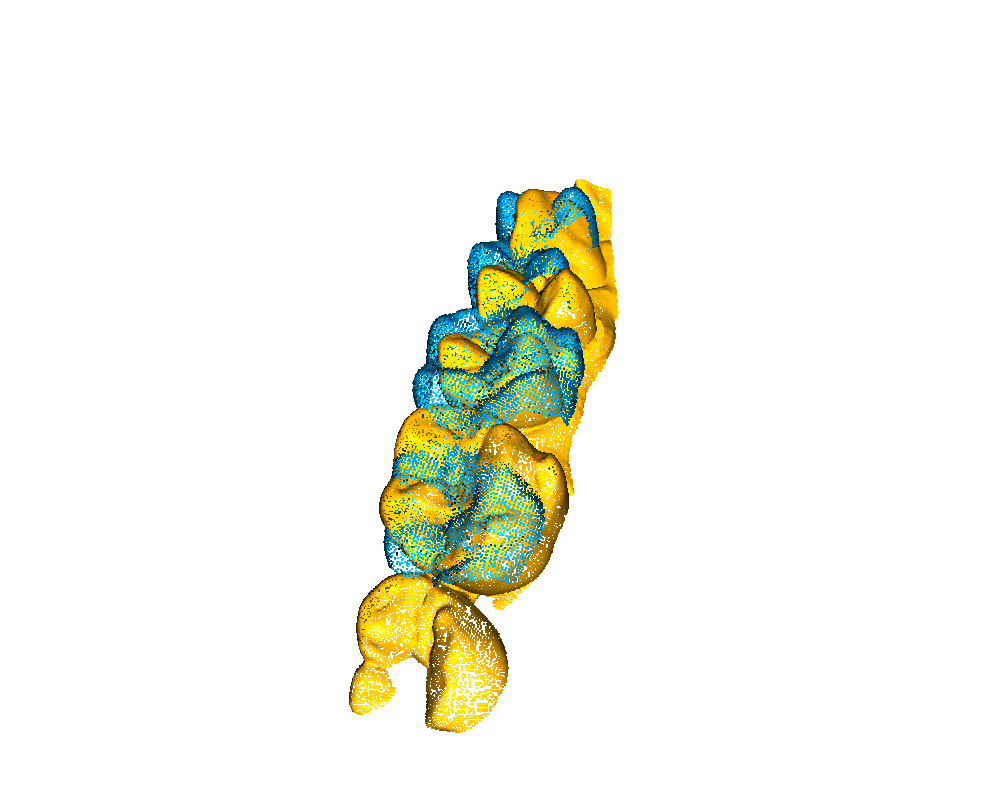

In [221]:
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## Pointcloud as input -without further enhancements (meshin etc)
DONE

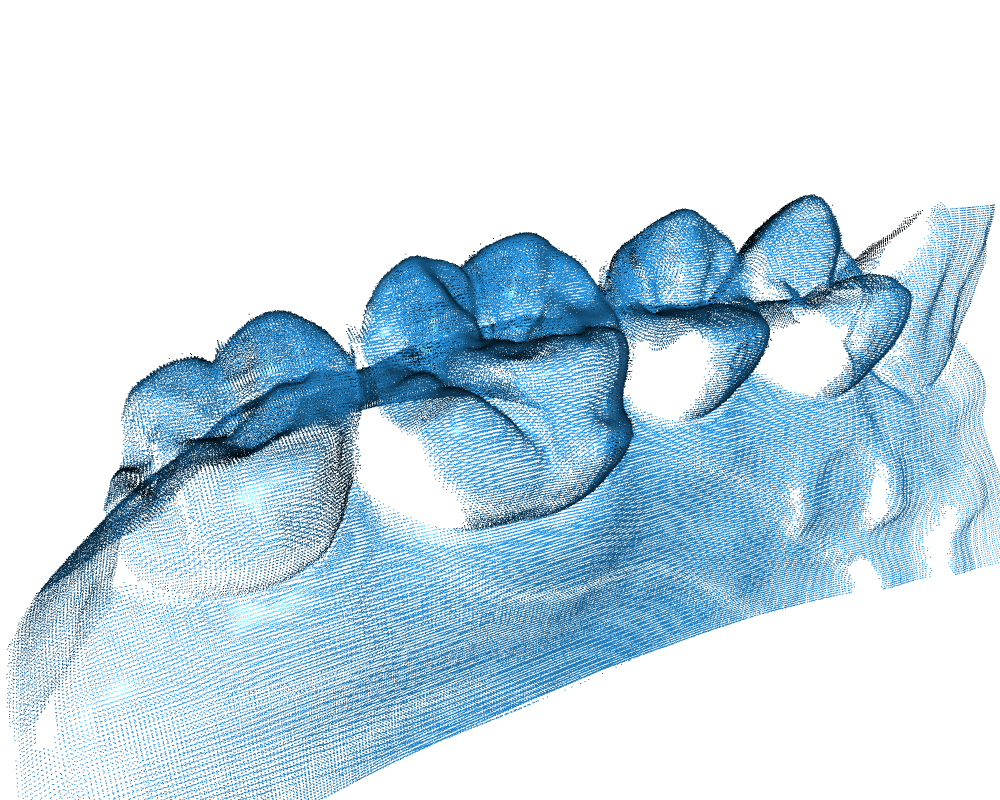

In [215]:
st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
custom_draw_geometry(st_pcd,
                     mytitle = "complete_cluster_3",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [222]:
model_list_stitches = [last_model_cropped,st_pcd]
model_lables = ["model_pc","stitched_pc"]

In [223]:
transf,new_picked_id_source,new_picked_id_target,registration = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = model_list_stitches,
                                                                             labels_stitches = model_lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scale_factor = 1000,
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             picked_id_source = list_picked_id_source[0],
                                                                             picked_id_target = list_picked_id_target[0],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
51851
39452
[25232, 44649, 5280]
RegistrationResult with fitness=2.179322e-03, inlier_rmse=2.225832e-02, and correspondence_set size of 113
Access transformation to get result.


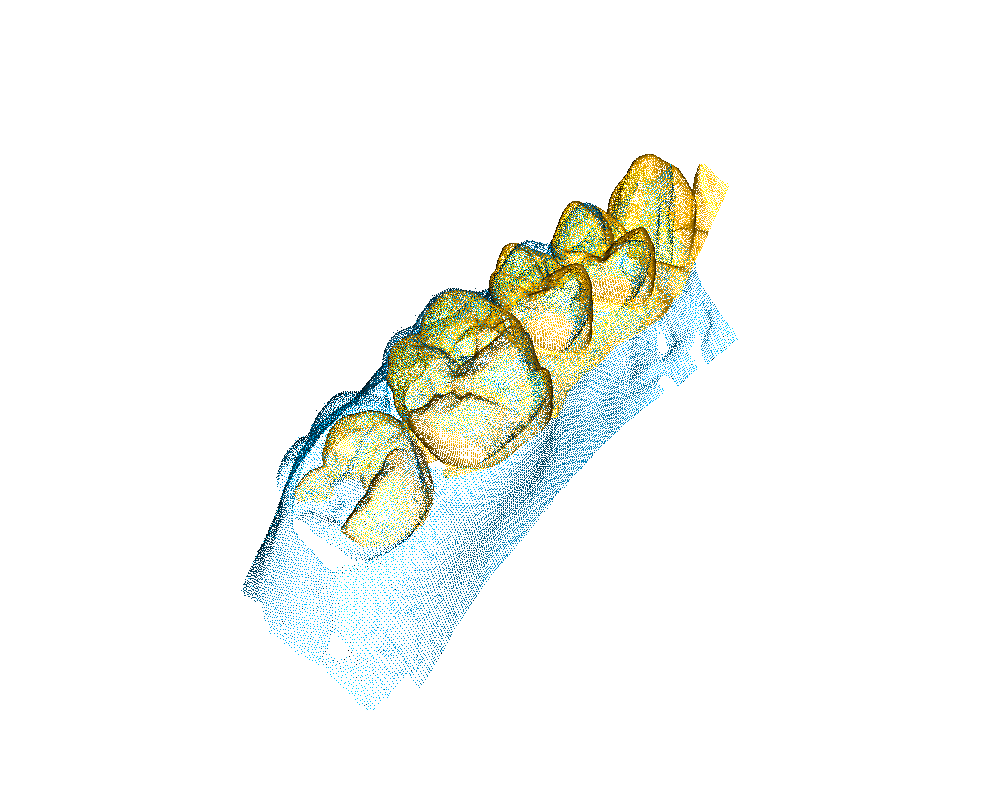

In [224]:
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [226]:
# number of point clouds
st_pcd.points

std::vector<Eigen::Vector3d> with 488502 elements.
Use numpy.asarray() to access data.

In [225]:
transf

array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
       [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
       [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [192]:
tstlist = ["thisfirst","second"]
var_1,var_2 = tstlist
var_1

'thisfirst'

## visualization

In [101]:
labels_stitches = ["model_pc","stitched_pc"]
list_stitches = [pcd,st_pcd]
color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]]
bothpointclouds = list_stitches[0].paint_uniform_color([1, 0.706, 0])+list_stitches[1].paint_uniform_color([0, 0.651, 0.929])

[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.


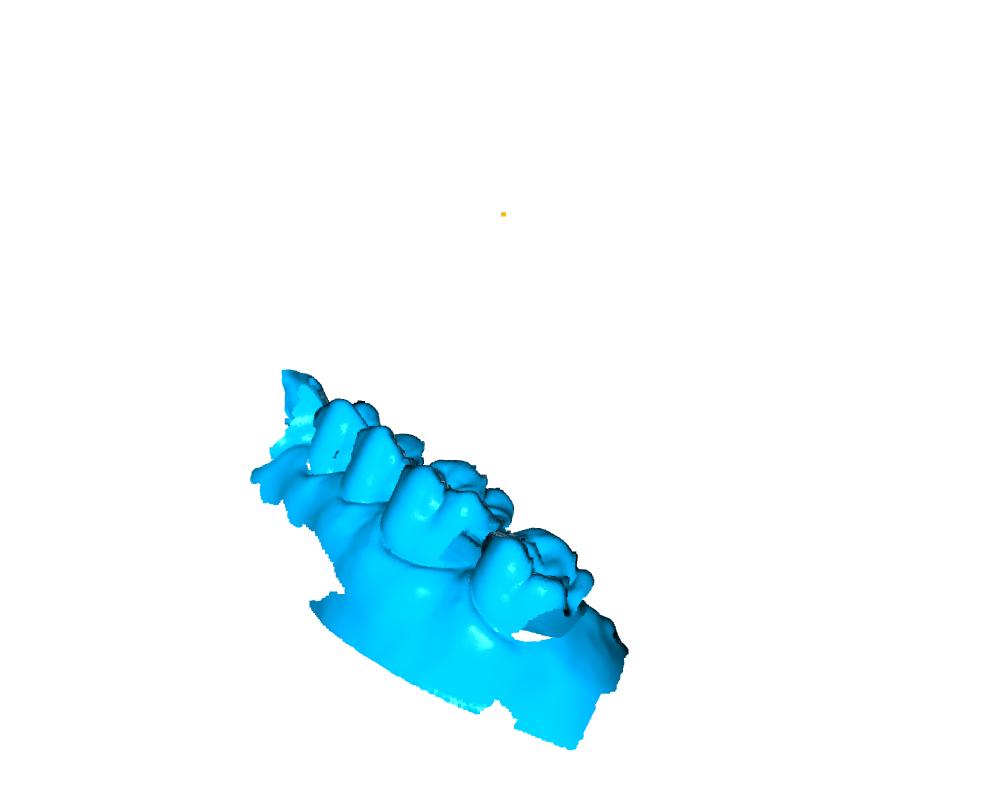

In [102]:
# plot a list of geometries
custom_draw_geometry(bothpointclouds,
                     mytitle = "bothpointclouds",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

we notice that the scale is out. how to rescale? we need for sure a scaling factor.

## try to apply an ad hoc transformation to rescale

In [135]:
scale_factor = 1000
trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                            [0.0, scale_factor, 0.0, 0.0],
                            [0.0, 0.0, scale_factor, 0.0], 
                            [0.0, 0.0, 0.0, 1.0]])

In [136]:
temp_pcd = copy.deepcopy(pcd)
temp_pcd.transform(trans_scale)

PointCloud with 3379896 points.

## reduce model

just to have faster computation.... anyhow we dont have the all point cloud reconstruced..

In [140]:
cropped_pcd = crop_save_return(pcd)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode
[Open3D INFO] Picked point #894070 (-0.04, -0.022, 0.056) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #514662 (-0.023, -0.03, 0.044) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
./model_cropped_6.ply
./ScreenCapture_2021-01-13-20-58-39.png


./ScreenCapture_2021-01-13-20-58-39.png


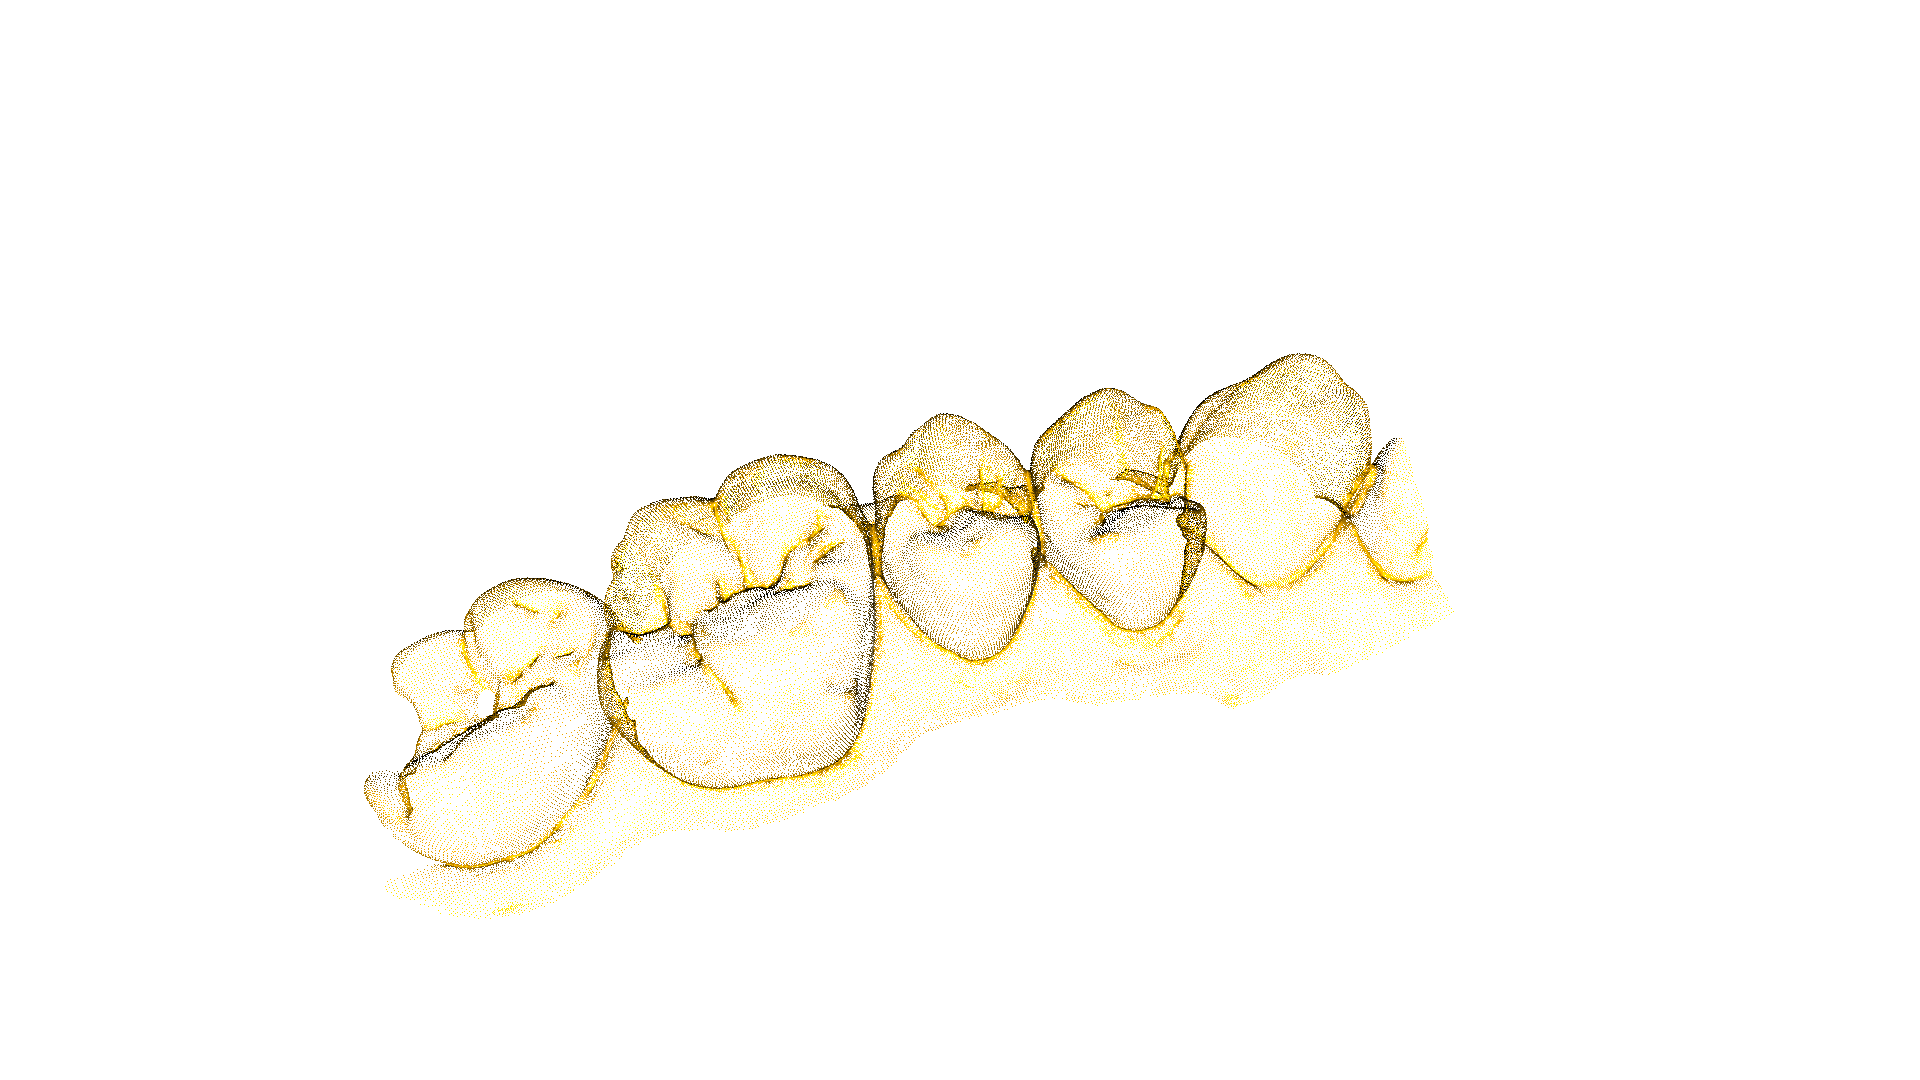

In [141]:
newest = last_file_containing("Screen", extension = '.png')
print (newest)
Im(filename=newest,width = 600) 

In [179]:
# transform again
temp_cropped_pcd = copy.deepcopy(cropped_pcd)
temp_cropped_pcd.transform(trans_scale)

PointCloud with 528615 points.

## heavy downsampling

yes no? how much? for now ad hoc to balance the pointclouds

In [120]:
list_stitches = [temp_cropped_pcd,st_pcd]

In [145]:
#different voxel size, tryig to have them comparable
down_cropped_pcd = temp_cropped_pcd.voxel_down_sample(voxel_size=0.1)
down_st_pcd = st_pcd.voxel_down_sample(voxel_size=0.2)

print (down_cropped_pcd.points)
print (down_st_pcd.points)

downsampled_stitches = [down_cropped_pcd,down_st_pcd]

std::vector<Eigen::Vector3d> with 51851 elements.
Use numpy.asarray() to access data.
std::vector<Eigen::Vector3d> with 39452 elements.
Use numpy.asarray() to access data.


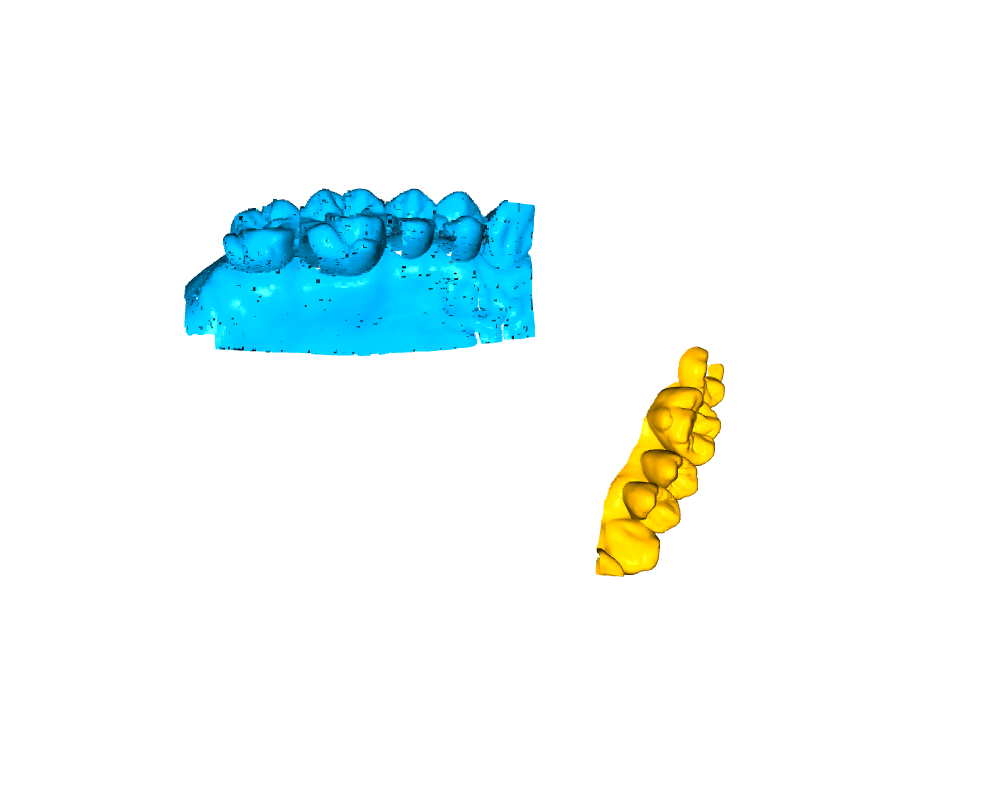

In [146]:
#cropped_pcl = down_cropped_pcd+st_pcd
cropped_pcl =downsampled_stitches[0]+downsampled_stitches[1]
custom_draw_geometry(cropped_pcl,
                     mytitle = "Cropped downsampled both",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## attempt to manual registration 

In [157]:
#source = list_stitches[i]
#target = list_stitches[j]

source = downsampled_stitches[i]
target = downsampled_stitches[j]

evaluation_by_manual_registration(source,target,
                         threshold = 0.03
                         )

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #25232 (-35., -19., 44.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #44649 (-31., -23., 42.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #5280 (-27., -29., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #24053

array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
       [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
       [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [169]:
### good sets of points from previous trials with manual selection
list_picked_id_source = [[25232, 44649, 5280],[47197,11790,9178]]
list_picked_id_target = [[24053,22883,38684],[26226,25403,16180]]

In [168]:
## here either one can feed correspondance points 
## or mark news on the point clouds, only 3 each with shift + left click

transf,picked_id_source,picked_id_target,registration = evaluation_by_manual_registration(source,target,
                                                                             threshold = 0.03,
                                                                             picked_id_source = list_picked_id_source[0],
                                                                             picked_id_target = list_picked_id_target[0]
                                                                            )

[25232, 44649, 5280]
Compute a rough transform using the correspondences given by user
Perform point-to-point ICP refinement



In [170]:
transf

array([[ -0.36535454,   0.92151115,  -0.13165587,  22.15045537],
       [ -0.49072739,  -0.31085269,  -0.81397619,  17.17282328],
       [ -0.79101371,  -0.23278276,   0.5657822 , -13.72684573],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

## result

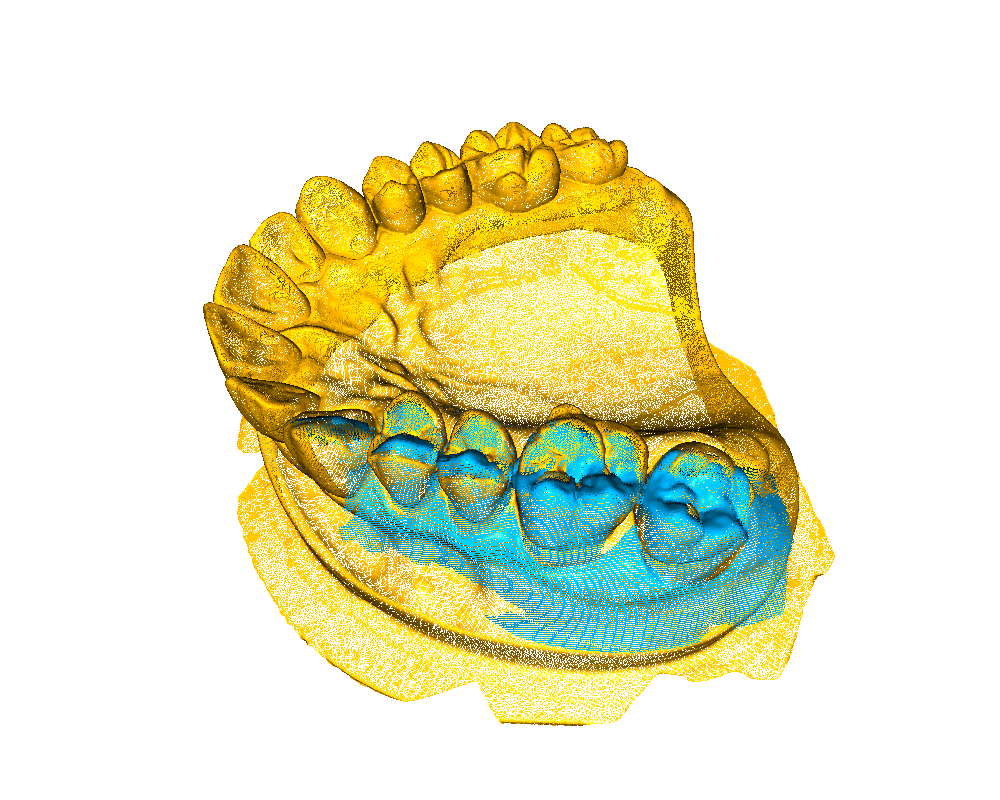

In [176]:
draw_registration_result(temp_pcd, st_pcd, transf)

Im(filename=last_file(".png"),
  width = 500, height = 400) 

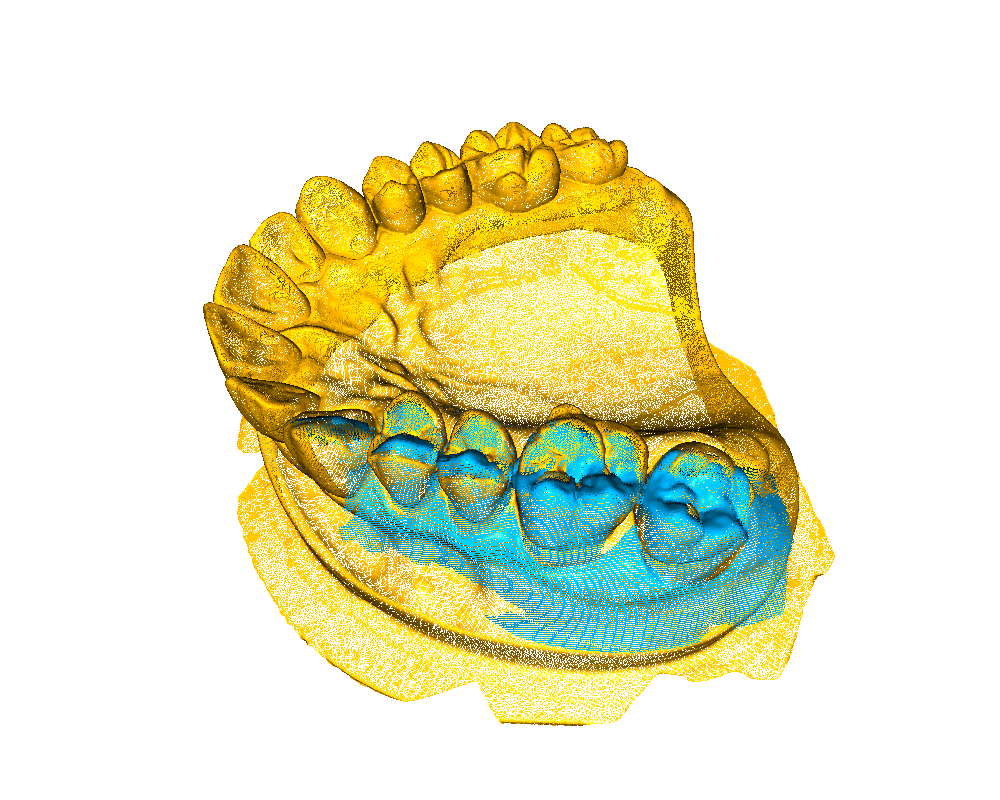

In [182]:
Im(filename=last_file("successfulmanualregistration.png"),
  width = 500, height = 400) 

## Bin

[Open3D INFO] Picked point #47197 (-35., -19., 43.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #11790 (-31., -24., 42.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #9178 (-28., -28., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #26226 (12., 4.9, 43.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #25403 (5.7, 5.7, 40.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #16180 (0.95, 5.0, 38.) to add in queue.

Compute a rough transform using the correspondences given by user